In [6]:
from models import *
import pandas as pd
import numpy as np
import tensorflow as tf
import shutil
import os
print("Tensorflow version: ", tf.__version__)

excel_reports = ".\Excel reports"
saved_models = ".\Saved models"
trained_models = ".\Trained models"
tested_models = ".\Tested models"

# Initiate parameters
ticker = 'nvda'
period = "1d" # EODAPI = "w" YahooAPI - "1wk"

eod_data_api = False
api_key = '631505e804ec58.42743136'

sentiment = True
# Sentiment types... APISentiment	VaderSentiment	CombinedVaderSentiment RobertaLargeSentiment #TwitterSentiment
sentiment_type = 'CombinedVaderSentiment'
aggr_function = 'median'

formation_window = 4
target_window = 1

#Split Ratios
split_ratio = 0.70
test_ratio = 0.15
validation_ratio = 0.15
export_excels = False

#trade condition
condition = True

# indicators
indicator1 = 6
indicator2 = 12
indicator3 = 24

# Do not change
window_size = formation_window + 1

if sentiment == False:
    news_df = None
if sentiment_type == 'TwitterSentiment':
    twitter = True
else:
    twitter = False
    
# Print stuffs
print("\nwindow size: ", window_size)
print("formation_window: ", formation_window)
print("target_window: ", target_window)
print("chart period: ", period)

# training batches
batch_size_train = 6
batch_size_valid = 2

# Period model is trained and tested
start_date = '2015-01-06'  # ''2020-01-01   2015-01-01 2019-01-06
end_date = '2022-11-26'  # '' 2022-08-17

# #Delete folders
shutil.rmtree(excel_reports)
shutil.rmtree(saved_models)
shutil.rmtree(trained_models)
shutil.rmtree(tested_models)

# Create folder, if exist pass exception
try:
    os.mkdir("Excel reports")
    os.mkdir("Saved models")
    os.mkdir("Trained models")
    os.mkdir("Tested models")
except:
    pass


Tensorflow version:  2.9.1

window size:  5
formation_window:  4
target_window:  1
chart period:  1d


In [7]:
if sentiment == True:

    from sentiment import GetNews

    GetNewsAPI = GetNews()

    GetNewsAPI.fit(ticker=ticker, start_date=start_date, end_date=end_date,
                   n_news=1000, token=api_key, offset=0, export_excel=export_excels, twitter=twitter)
    news_df = GetNewsAPI.transform()
news_df


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\z0040jeb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\z0040jeb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


--------> GetNews completed



,Date,Title,Content,APISentiment,VaderSentiment,CombinedVaderSentiment
0,2022-11-26,What's Going On With Some of the Biggest Names...,"Emily talks with Sumit Singh, CEO of Chewy, ab...",0.547,0.0000,0.5470
1,2022-11-25,Analysts are Upgrading These 9 Tech Stocks,"In this article, we will take a look at the 9 ...",0.998,0.0000,0.9980
2,2022-11-25,Was Alexander West’s Blue Pool Capital Right A...,"In this article, we discuss the top 10 stock p...",0.998,0.0000,0.9980
3,2022-11-25,Obama Stock Portfolio: 10 Year Returns,"In this article, we discuss the 10-year return...",0.999,0.0000,0.9990
4,2022-11-25,3 Tech Stocks You Can Count on in This Uncerta...,2022 was a tough one for tech stocks. Most wer...,0.998,-0.2960,0.7020
...,...,...,...,...,...,...
993,2022-08-09,Declining semiconductor stocks drag markets lower,Yahoo Finance Live anchor Seana Smith looks at...,0.000,-0.4767,-0.4767
994,2022-08-09,Stock Market Falls On Tech Warnings; These Res...,The stock market remained lower after prominen...,-0.361,-0.2960,-0.6570
995,2022-08-09,Why Nvidia Stock Was Down on Tuesday,Shares of Nvidia (NASDAQ: NVDA) were trading d...,0.077,0.0000,0.0770
996,2022-08-09,Micron and Nvidia: Buy or Sell After Bearish U...,Nvidia provided negative news on Monday and Mi...,-0.572,0.0000,-0.5720


In [8]:
from transformers_preprocess import PullData

GetData = PullData()

print("ticker: ",ticker)
print("EOD api: ",eod_data_api)

GetData.fit(ticker=ticker,
            start_date=start_date,
            end_date=end_date,
            interval=period,  # 1wk
            progress=False,
            condition=condition,
            form_window=formation_window,
            target_window=target_window,
            timeperiod1=indicator1,#6
            timeperiod2=indicator2,#12
            timeperiod3=indicator3,#24
            export_excel=export_excels,
            excel_path=excel_reports,
            listed_conditions=None,
            sentiment=sentiment,
            sentiment_type=sentiment_type, #sentiment_type
            news_df=news_df,
            chart_period=period,
            sentiment_aggr=aggr_function,
            eod_API=eod_data_api,
            api_key=api_key
            )

data_prep = GetData.transform()

# Validation
if window_size != (formation_window + 1):
    raise Exception(
        f"Error - window_size ({window_size}) must be equal to sum of formation_window ({formation_window}) and value 1.")
data_prep.head(20)


ticker:  nvda
EOD api:  False
initial shape:  (1989, 6)


,Date,Open,High,Low,Close,EMA6,EMA12,EMA24,CombinedVaderSentiment,trades
0,2015-01-05 00:00:00,5.0325,5.0475,4.9250,4.9475,4.900417,4.935208,4.974688,0.0,1
1,2015-01-06 00:00:00,4.9550,4.9600,4.7925,4.7975,4.900417,4.935208,4.974688,0.0,1
2,2015-01-07 00:00:00,4.8325,4.8750,4.7700,4.7850,4.900417,4.935208,4.974688,0.0,1
3,2015-01-08 00:00:00,4.8400,4.9950,4.8375,4.9650,4.900417,4.935208,4.974688,0.0,1
0,Month,4.9825,5.0225,4.9150,4.9850,4.900417,4.935208,4.974688,0.0,1
1,2015-01-06 00:00:00,4.9550,4.9600,4.7925,4.7975,4.900417,4.935208,4.974688,0.0,2
2,2015-01-07 00:00:00,4.8325,4.8750,4.7700,4.7850,4.900417,4.935208,4.974688,0.0,2
3,2015-01-08 00:00:00,4.8400,4.9950,4.8375,4.9650,4.900417,4.935208,4.974688,0.0,2
4,2015-01-09 00:00:00,4.9825,5.0225,4.9150,4.9850,4.900417,4.935208,4.974688,0.0,2
0,Month,4.9975,5.0000,4.8775,4.9225,4.900417,4.935208,4.974688,0.0,2


In [9]:
####################################################################

from transformers_preprocess import NormalizeData

NormalizeData = NormalizeData()

NormalizeData.fit(window_size=window_size, shuffle=False, debug=False,
                  export_excel=export_excels, excel_path=excel_reports, sentiment=sentiment)

data_normalized, Dates = NormalizeData.transform(data_prep)
data_normalized.head()
# Get only forecasts for model testing
# x_valid_x = data_normalized[['maxv','minv']].copy() #extreme values for reverting normalization
# x_valid = data_normalized.iloc[:,:-2].copy() #dataset for forecast


Dataframe shape:  (3025, 10)
Number of formations:  605
--------> NormalizeData completed



,Open,High,Low,Close,EMA6,EMA12,EMA24,CombinedVaderSentiment,maxv,minv
0,0.945945,1.000000,0.558559,0.639640,0.46997,0.595345,0.737612,0.0,5.0475,4.77
1,0.666666,0.684685,0.081081,0.099100,0.46997,0.595345,0.737612,0.0,5.0475,4.77
2,0.225225,0.378378,0.000000,0.054054,0.46997,0.595345,0.737612,0.0,5.0475,4.77
3,0.252253,0.810810,0.243244,0.702703,0.46997,0.595345,0.737612,0.0,5.0475,4.77
0,0.765766,0.909910,0.522522,0.774775,0.46997,0.595345,0.737612,0.0,5.0475,4.77


In [10]:
# # Make Calculations
# ttl_windows = len(data_normalized)/window_size
# print("ttl windows: ",ttl_windows)
# trainsubset_window = round(ttl_windows*split_ratio, 0)
# print("trainsubset: ",trainsubset_window)

# ttl_xval =+ ttl_windows-trainsubset_window

# valsubset = round(ttl_windows*validation_ratio, 0)
# testsubset = round(ttl_windows*test_ratio, 0)
# print("ttl_xval: ",valsubset)
# print('test set',testsubset)
# #xtrain_split = trainsubset * self.window_size

In [11]:
####################################################################

from training import SplitData

SplitData = SplitData()

SplitData.fit(split_ratio=split_ratio, window_size=window_size,
              dates=Dates, debug=False, export_excel=export_excels, excel_path=excel_reports, sentiment=sentiment,validation_set=validation_ratio, test_set=test_ratio)

x_train, x_valid, x_test, x_train_x, x_valid_x, x_test_x = SplitData.transform(data_normalized)
# x_train.head(25)


DF Shape:  (3025, 10)
train_split split:  2120
validation split:  455
total validation windows:  181.0

Split train ratio: 70 %
Split validation ratio: 15 %
Split test ratio: 15 %

train period: 2015-01-05 - 2021-10-05
valid period: 2021-10-01 - 2022-05-13
test period: 2022-05-11 - 2022-10-28

Total Windows:  605.0
x_train windows:  424.0
x_valid windows:  91.0
x_test windows:  90.0
--------> SplitData completed



In [12]:
from training import GetTensoredDataset

GetTensoredDataset = GetTensoredDataset()

GetTensoredDataset.fit(window_size=window_size, batch_size=batch_size_train, train=True, debug=False)

x_train_tensors, _ = GetTensoredDataset.transform(x_train)

# c = 0
# for batch in x_train_tensors:
#     if c < 3:
#         print(batch)
#     else:
#         break

--------> GetTensoredDataset completed



In [13]:
from training import GetTensoredDataset

GetTensoredValidDataset = GetTensoredDataset()

GetTensoredValidDataset.fit(
    window_size=window_size, batch_size=batch_size_valid, train=False, debug=False)

x_valid_tensors, _ = GetTensoredValidDataset.transform(x_valid)
x_test_tensors, labels = GetTensoredValidDataset.transform(x_test)
# for batch in x_valid_tensors:
#     if c < 3:
#         print(batch)
#     else:
#         break

--------> GetTensoredDataset completed

--------> GetTensoredDataset completed



<b>Model Training</b>

In [14]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint


model_name = f'{saved_models}/{str.upper(ticker)}_{formation_window}_{target_window}_{window_size}_{split_ratio}_{period}_{sentiment}_{start_date}_{end_date}.h5'

early_stopping = EarlyStopping(
    monitor='val_loss', patience=6, mode='min', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=2, min_lr=10e-15,
                              verbose=0)

model_checkpoint = ModelCheckpoint(monitor='val_loss',
                                   filepath=model_name,
                                   save_best_only=True)

callbacks = [early_stopping, reduce_lr, model_checkpoint]


def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true*y_pred, 0),
                    penalty * tf.square(y_true-y_pred),
                    tf.square(y_true - y_pred)
                    )

    return(tf.reduce_mean(loss, axis=-1))


tf.keras.losses.sign_penalty = sign_penalty


Bellow code is used to find the best model architecture, recommended to use cloud computing

In [15]:
# from testing import get_models,optimize
# from datetime import datetime
# start_time = datetime.now().strftime("%H:%M:%S")
# start = datetime.now()
# print("Training started at ",start_time)
# tf.random.set_seed(7788)
# np.random.seed(7788)

# # #Permutation testing
# # num_layers = 2
# # min, max = 2, 4
# # node_step_size = 2
# # node_options = list(range(min, max + 1, node_step_size))
# # two_layer_possibilities = [node_options, node_options]
# # layer_node_permutations  = list(itertools.product(*two_layer_possibilities))

# f_df = pd.DataFrame()

# for layer in range(7,8):
#     progress_time = datetime.now().strftime("%H:%M:%S")
#     print("\n------ > Layer: ",layer)
#     print("Layer loop started: ",progress_time)

#     all_models, names = get_models(num_layers=layer, min=2, max=4, node_step_size=2, features=x_train.shape[1])

#     progress_time = datetime.now().strftime("%H:%M:%S")
#     print("Models: ",len(all_models))
#     print("Models constructed: ",progress_time)
    
#     optimizing_df = optimize(models=all_models,X_train=x_train_tensors,X_valid=x_valid_tensors,X_test=x_valid,labels=labels,epochs=1000,verbose=0,window_size=window_size,callbacks=callbacks,layer=layer,ticker=ticker,excel_path=tested_models)
# # optimizing_df
#     #f_df = f_df.append(optimizing_df)
    
# end_time = datetime.now().strftime("%H:%M:%S")
# end = datetime.now()
# print("\nTraining ended at ",end_time) 
# print(f"Training ended in {round((end-start).total_seconds(),2)} seconds")

In [16]:
# print(len(optimizing_df))
# optimizing_df
#32 models = 13mins
#len(all_models)


Get Model

In [17]:
from datetime import datetime
start_time = datetime.now().strftime("%H:%M:%S")
start = datetime.now()
print("Training started at ",start_time)

tf.random.set_seed(7788)
np.random.seed(7788)
features = x_train.shape[1]

print(f"Model training - {str.upper(ticker)} \n")

#model = clb_model(features)
#model = mrk_model(features)
#model =  mrk_model_sent_medium(features)
model = aapl_1week_model(features)


optimizer2 = tf.keras.optimizers.Adam(
            learning_rate=0.00007, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
optimizer5 = tf.keras.optimizers.Adagrad(
    learning_rate=0.0006, initial_accumulator_value=5, epsilon=1e-07, name='Adagrad')

model.compile(loss=sign_penalty,
              optimizer=optimizer5
              )

model.fit(x_train_tensors, epochs=1000, callbacks=[callbacks], validation_data=x_valid_tensors,verbose=1)


end_time = datetime.now().strftime("%H:%M:%S")
end = datetime.now()
print("\nTraining ended at ",end_time) 
print(f"Training ended in {round((end-start).total_seconds(),2)} seconds")



Training started at  14:15:06
Model training - NVDA 

Epoch 1/1000
71/71 [==============================] - 10s 57ms/step - loss: 0.2544 - val_loss: 0.1750 - lr: 6.0000e-04
Epoch 2/1000
71/71 [==============================] - 1s 8ms/step - loss: 0.1905 - val_loss: 0.1386 - lr: 6.0000e-04
Epoch 3/1000
71/71 [==============================] - 1s 8ms/step - loss: 0.1589 - val_loss: 0.1174 - lr: 6.0000e-04
Epoch 4/1000
71/71 [==============================] - 1s 7ms/step - loss: 0.1389 - val_loss: 0.1035 - lr: 6.0000e-04
Epoch 5/1000
71/71 [==============================] - 1s 8ms/step - loss: 0.1251 - val_loss: 0.0938 - lr: 6.0000e-04
Epoch 6/1000
71/71 [==============================] - 1s 10ms/step - loss: 0.1151 - val_loss: 0.0869 - lr: 6.0000e-04
Epoch 7/1000
71/71 [==============================] - 1s 10ms/step - loss: 0.1076 - val_loss: 0.0818 - lr: 6.0000e-04
Epoch 8/1000
71/71 [==============================] - 1s 8ms/step - loss: 0.1019 - val_loss: 0.0781 - lr: 6.0000e-04
Epoch 

In [18]:
def model_forecast(model, series, window_size, debug):
    """
    Get model, data and window size as an input. 
    Make prediction window is subtracted by 1, since we do not need label in window, 
    label value is skipped
    """
    c = 0

    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size-1, shift=window_size, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))

    if debug == True:
        # This block of code will print out data on which is made prediction
        for item in ds:
            c += 1
            if c < 3:
                print("\n"+str(c) + " prediction:\n ", item)
            else:
                break

    ds = ds.batch(1).prefetch(1)
    forecast = model.predict(ds)
    forecast2 = np.squeeze(forecast)
    return forecast2


forecast = model_forecast(model, x_test, window_size=window_size, debug=False)


90/90 [==============================] - 2s 2ms/step


In [19]:
from transformers_preprocess import ReverseNormalization

ReverseNormalization = ReverseNormalization()

ReverseNormalization.fit(forecasts=forecast, labels=labels,
                         x_valid=x_test, x_valid_x=x_test_x, window_size=window_size, debug=False,
                         sentiment=sentiment,sentiment_type=sentiment_type)

df = ReverseNormalization.transform()
df.head(25)

--------> ReverseNormalization completed



,Open,High,Low,Close,EMA6,EMA12,EMA24,labels,prediction,CombinedVaderSentiment
In,,,,,,,,,,
0,173.470001,177.529999,165.679993,166.300003,178.237897,186.855561,201.029793,NaN,NaN,0.0
1,162.190002,167.880005,155.669998,161.750000,173.527069,182.993167,197.887409,NaN,NaN,0.0
2,167.880005,179.279999,165.929993,177.059998,174.536477,182.080372,196.221216,NaN,NaN,0.0
3,175.089996,177.880005,171.059998,172.639999,173.994627,180.628007,194.334719,NaN,NaN,0.0
4,180.740005,183.710007,176.339996,181.770004,173.527069,182.993167,197.887409,183.710007,181.751623,0.0
5,162.190002,167.880005,155.669998,161.750000,173.527069,182.993167,197.887409,NaN,NaN,0.0
6,167.880005,179.279999,165.929993,177.059998,174.536477,182.080372,196.221216,NaN,NaN,0.0
7,175.089996,177.880005,171.059998,172.639999,173.994627,180.628007,194.334719,NaN,NaN,0.0
8,180.740005,183.710007,176.339996,181.770004,176.216163,180.803699,193.329542,NaN,NaN,0.0


In [20]:
from final_evaluation import GetFinalDataframe

GetFinalDataframe = GetFinalDataframe()

GetFinalDataframe.fit(dates=Dates,
                      x_test=x_test,
                      sentiment=sentiment,
                      sentiment_type=sentiment_type)

reversed_df = GetFinalDataframe.transform(df)
reversed_df.head(25)


--------> GetFinalDataframe



,Open,High,Low,Close,EMA6,EMA12,EMA24,labels,prediction,CombinedVaderSentiment,Datetime
In,,,,,,,,,,,
0,173.470001,177.529999,165.679993,166.300003,178.237897,186.855561,201.029793,nn,nn,0.0,2022-05-11
1,162.190002,167.880005,155.669998,161.750000,173.527069,182.993167,197.887409,nn,nn,0.0,2022-05-12
2,167.880005,179.279999,165.929993,177.059998,174.536477,182.080372,196.221216,nn,nn,0.0,2022-05-13
3,175.089996,177.880005,171.059998,172.639999,173.994627,180.628007,194.334719,nn,nn,0.0,2022-05-16
4,180.740005,183.710007,176.339996,181.770004,173.527069,182.993167,197.887409,183.710007,181.751623,0.0,2022-05-17
5,162.190002,167.880005,155.669998,161.750000,173.527069,182.993167,197.887409,nn,nn,0.0,2022-05-12
6,167.880005,179.279999,165.929993,177.059998,174.536477,182.080372,196.221216,nn,nn,0.0,2022-05-13
7,175.089996,177.880005,171.059998,172.639999,173.994627,180.628007,194.334719,nn,nn,0.0,2022-05-16
8,180.740005,183.710007,176.339996,181.770004,176.216163,180.803699,193.329542,nn,nn,0.0,2022-05-17


In [21]:
from final_evaluation import GetModelPerformance
#print(f"Window size: {window_size} \n")
print(f"ticker: {str.upper(ticker)}\n")
GetModelPerformance = GetModelPerformance()

GetModelPerformance.fit(acceptance=0,
                        penalization=0,
                        entry_candle='Current Open',#Current Open
                        budget=10000,
                        window_size=window_size,
                        export_excel=True,
                        excel_path = excel_reports,
                        sentiment=sentiment)

trades_df = GetModelPerformance.transform(reversed_df)
#trades_df.head(25)


ticker: NVDA

Formations:  90
period: 2022-05-11 - 2022-10-28
Entry Candle:  Current Open

Total Trades:  82
Profit Trades:  50
Loss Trades:  32

Win Ratio: 61.0 %
Loss Ratio: 39 %

Trade nr with exact TP:  22
Ratio of exact TP: 26.83 %

Average profit per trade:  137

Gross profit:  11232
Gross loss:  -7440

Net profit:  3792


In [22]:
trade = 2
budget = 10000
entry_candle = 'Current Open'
df = trades_df.head(3)



Trade:  2
Window size:  5
Period: 2022-05-12 - 2022-05-17

Budget:  10000

Entry price:  177.05
Label (target):  181.18
Model prediction:  184.4
Market Change: -7.67 $
Profit: -433.21 $


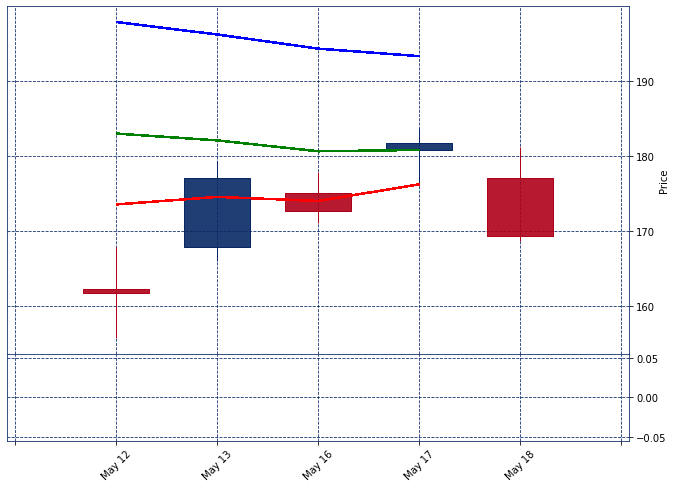

,Open,High,Low,Close,EMA6,EMA12,EMA24,labels,prediction,CombinedVaderSentiment,Datetime,profit,trade
In,,,,,,,,,,,,,
5,162.190002,167.880005,155.669998,161.750000,173.527069,182.993167,197.887409,nn,nn,0.0,2022-05-12,-7.669998,2
6,167.880005,179.279999,165.929993,177.059998,174.536477,182.080372,196.221216,nn,nn,0.0,2022-05-13,-7.669998,2
7,175.089996,177.880005,171.059998,172.639999,173.994627,180.628007,194.334719,nn,nn,0.0,2022-05-16,-7.669998,2
8,180.740005,183.710007,176.339996,181.770004,176.216163,180.803699,193.329542,nn,nn,0.0,2022-05-17,-7.669998,2
9,177.050003,181.179993,168.639999,169.380005,174.536477,182.080372,196.221216,181.179993,184.397325,0.0,2022-05-18,-7.669998,2


In [23]:
#trade = 4
from plotting import PlotTrade

df = PlotTrade(trade=trade,trades_df=trades_df,window_size=window_size,entry_candle=entry_candle,budget=budget,sentiment=sentiment)
trade += 1
df


In [24]:
from final_evaluation import GetPerformanceReport

GetPerformanceReport = GetPerformanceReport()

GetPerformanceReport.fit(entry_candle="Current Open",
                        budget=10000,
                        window_size=window_size,
                        export_excel=True,
                        excel_path = excel_reports)

trades_df_final = GetPerformanceReport.transform(trades_df)
trades_df_final

--------> GetPerformanceReport completed



,Open,High,Low,Close,EMA6,EMA12,EMA24,labels,prediction,CombinedVaderSentiment,Datetime,profit,trade,Entry,Performance
0,173.470001,177.529999,165.679993,166.300003,178.237897,186.855561,201.029793,nn,nn,0.00000,2022-05-11,1.011617,1,nn,nn
1,162.190002,167.880005,155.669998,161.750000,173.527069,182.993167,197.887409,nn,nn,0.00000,2022-05-12,1.011617,1,nn,nn
2,167.880005,179.279999,165.929993,177.059998,174.536477,182.080372,196.221216,nn,nn,0.00000,2022-05-13,1.011617,1,nn,nn
3,175.089996,177.880005,171.059998,172.639999,173.994627,180.628007,194.334719,nn,nn,0.00000,2022-05-16,1.011617,1,nn,nn
4,180.740005,183.710007,176.339996,181.770004,173.527069,182.993167,197.887409,183.710007,181.751623,0.00000,2022-05-17,1.011617,1,180.740005,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,125.080002,127.099998,120.639999,125.989998,122.588284,122.039871,125.437217,nn,nn,0.25315,2022-10-24,5.826196,82,nn,nn
406,126.940002,133.000000,126.639999,132.610001,125.451632,123.666045,126.011040,nn,nn,0.85420,2022-10-25,5.826196,82,nn,nn
407,128.690002,133.880005,127.080002,128.960007,126.454025,124.480500,126.246957,nn,nn,0.81300,2022-10-26,5.826196,82,nn,nn
408,136.300003,138.380005,131.220001,131.759995,127.970016,125.600422,126.688000,nn,nn,0.94000,2022-10-27,5.826196,82,nn,nn


<b>Plot Chart With Labels and Predictions</b>

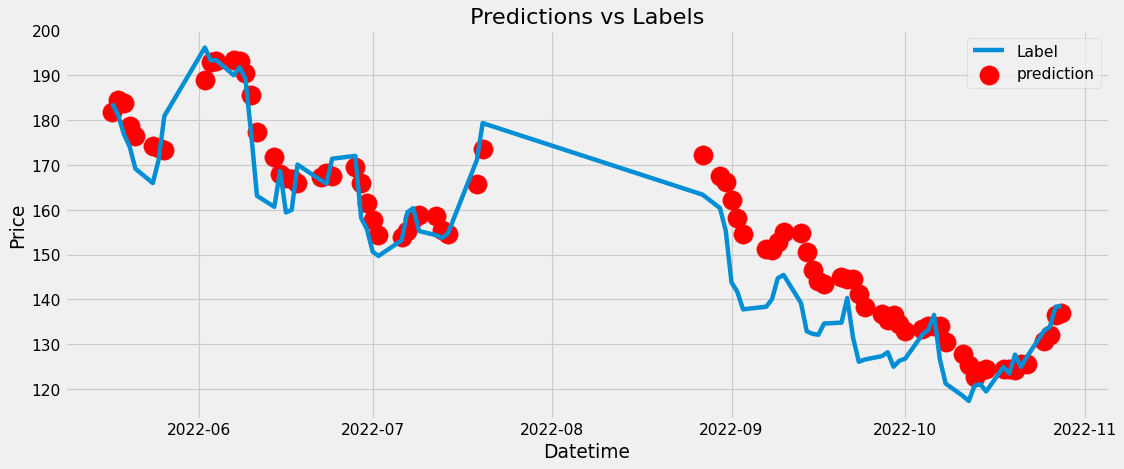

In [25]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
figure(figsize=(15, 6), dpi=80)

df_plot = trades_df_final[['Datetime','labels','prediction']]
df_plot = df_plot[df_plot.labels != 'nn']

x1 = df_plot['labels']
x2 = df_plot['prediction']
y = df_plot['Datetime']

# plot lines
plt.plot(y, x1, label = "Label")
plt.scatter(y, x2, label = "prediction",color='red', s=300)
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.title('Predictions vs Labels')
plt.legend()
plt.show()

In [22]:
from final_evaluation import MakeSinglePrediction

model_name = f'{saved_models}/{str.upper(ticker)}_{formation_window}_{target_window}_{window_size}_{split_ratio}_{period}_{sentiment}_{start_date}_{end_date}.h5'

MakeSinglePrediction = MakeSinglePrediction()

fit_output = MakeSinglePrediction.fit(
                        model_name=model_name,
                        form_window=formation_window,
                        ticker=ticker,
                        start_date="2019-03-18",
                        end_date="2022-11-27",
                        interval=period, #1wk
                        progress=False,
                        condition=condition,
                        timeperiod1=indicator1,
                        timeperiod2=indicator2,
                        timeperiod3=indicator3,
                        debug=False,
                        budget=10000,
                        penalization=0,
                        acceptance=0,
                        entry_candle='Current Close',
                        news_df=news_df,
                        sentiment=sentiment,
                        sentiment_type = sentiment_type,
                        sentiment_aggr = aggr_function)

#fit method outputs tuple, get only trade formation out of tuple
trade_formation = fit_output[1]
final_trade_formation = trade_formation.head(formation_window)
final_trade_formation
###IMPORTANT!!!!
#trade_formation dataframe must be checked before transformation, sometimes df pulled via yahoo finance 
# is shifted, and trade formation does not have entire formation in itself. in this case there must 
# be changed end_date in fit method
final_trade_formation



Trading condition passed, you can make prediction

Entry price:  148.11


,Date,Open,High,Low,Close,EMA6,EMA12,EMA24,CombinedVaderSentiment
0,2022-10-31,153.160004,155.449997,134.380005,138.380005,145.607020,148.245164,151.015095,0.391060
1,2022-11-07,137.110001,150.009995,134.589996,149.699997,146.776442,148.468985,150.909887,0.359324
2,2022-11-14,148.970001,153.589996,146.149994,151.289993,148.066028,148.902986,150.940295,0.414936
3,2022-11-21,150.160004,151.830002,146.929993,148.110001,148.078591,148.780988,150.713872,0.411478



Ticker:  aapl
1/1 [==============================] - 1s 1s/step

Entry candle (Current Close)

Budget:  10000

Entry price:  148.11
Prediction:  151.51
Expected Market move:  3.4
Expected Profit:  231.52


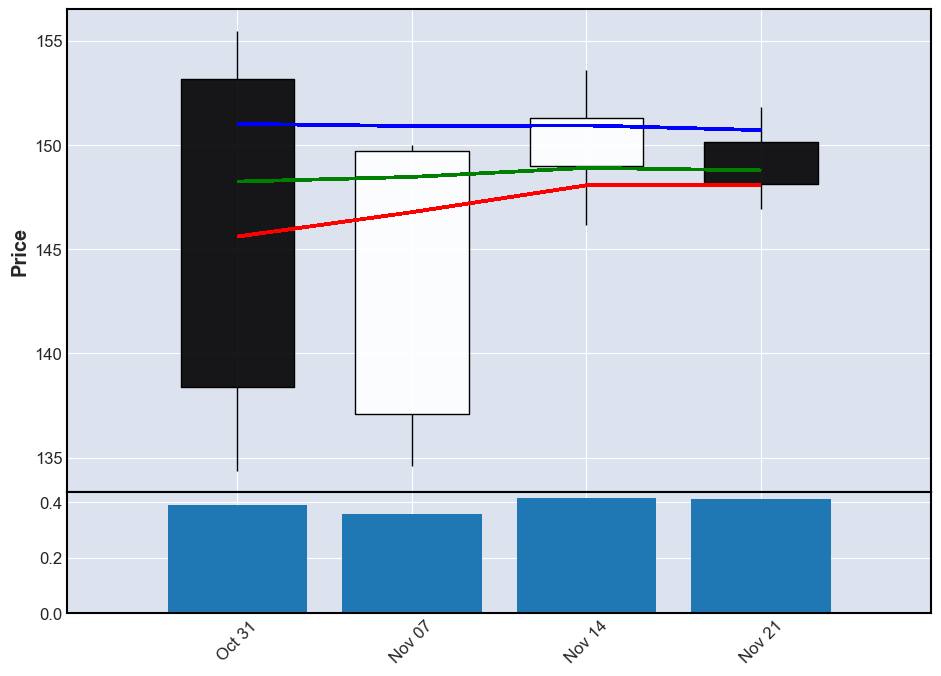

In [23]:
#Make prediction
MakeSinglePrediction.transform(final_trade_formation)

#PLot current chart and sentiment
from plotting import PlotCurrentFormation

PlotCurrentFormation(final_trade_formation,sentiment=sentiment)


<b>Record Predictions</b>

In [26]:
final_df = pd.DataFrame()
#List all predictions
dicti_prediction1 = {'ticker':['AAPL'],'Date':['29.10.2022'],'prediction':['156,05'],'real market move':['pending'],'model':[""]}


trades_tuple = (dicti_prediction1)
for item in trades_tuple:
    df_pred = pd.DataFrame(item)
    final_df = final_df.append(df_pred)
    final_df = final_df.sort_values('ticker',ascending=False)
final_df

ValueError: DataFrame constructor not properly called!